# Country Analysis and Clustering


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 
df = pd.read_csv('CIA_Country_Facts.csv')

## Exploratory Data Analysis


In [3]:
df.head().T

,0,1,2,3,4
Country,Afghanistan,Albania,Algeria,American Samoa,Andorra
Region,ASIA (EX. NEAR EAST),EASTERN EUROPE,NORTHERN AFRICA,OCEANIA,WESTERN EUROPE
Population,31056997,3581655,32930091,57794,71201
Area (sq. mi.),647500,28748,2381740,199,468
Pop. Density (per sq. mi.),48,124.6,13.8,290.4,152.1
Coastline (coast/area ratio),0,1.26,0.04,58.29,0
Net migration,23.06,-4.93,-0.39,-20.71,6.6
Infant mortality (per 1000 births),163.07,21.52,31,9.27,4.05
GDP ($ per capita),700,4500,6000,8000,19000
Literacy (%),36,86.5,70,97,100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null float64
Coastline (coast/area ratio)          227 non-null float64
Net migration                         224 non-null float64
Infant mortality (per 1000 births)    224 non-null float64
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null float64
Phones (per 1000)                     223 non-null float64
Arable (%)                            225 non-null float64
Crops (%)                             225 non-null float64
Other (%)                             225 non-null float64
Climate                               205 non-null float64
Birthrate       

# Exploratory Data Analysis

Let's create some visualizations. Please feel free to expand on these with your own analysis and charts!

In [5]:
columns = np.array(df.columns)
columns

array(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service'], dtype=object)

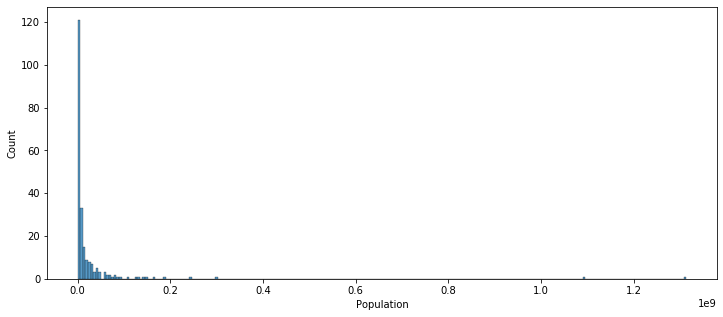

In [6]:
plt.figure(figsize=(12,5))
sns.histplot(df.Population)

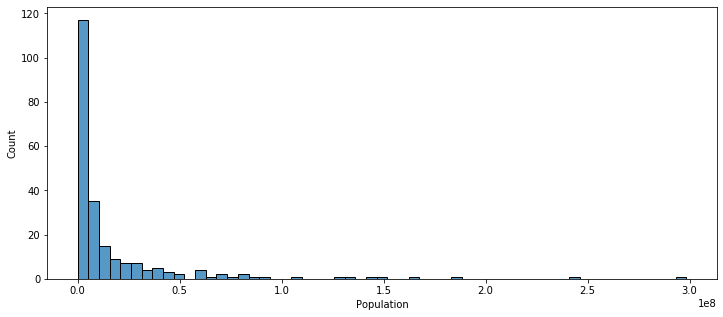

In [8]:
plt.figure(figsize=(12,5))
sns.histplot(df.Population[df.Population.between(0,5*(10**8))])#500000000)])
# plt.xlim(0,0.6)

#### Exploring GDP and Regions. Showing the mean GDP per Capita per region 

In [9]:
columns

array(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

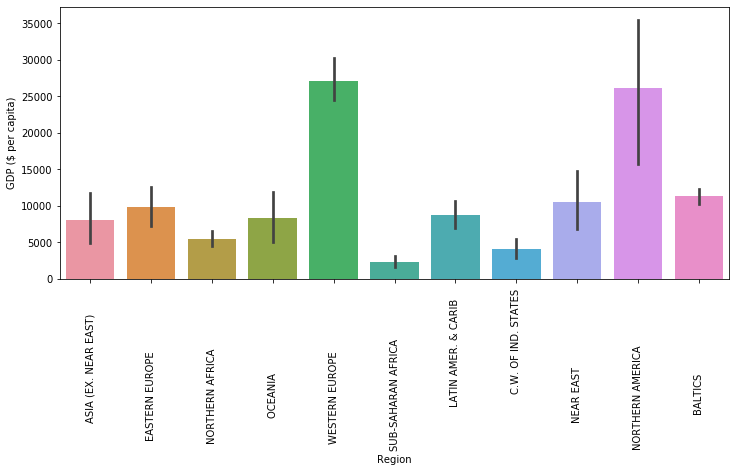

In [10]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, y='GDP ($ per capita)',x='Region')#,ci='sd')
# sns.catplot(data=df, y='GDP ($ per capita)',x='Region',kind='bar',ci='sd')
plt.xticks(rotation=90)

There are two regions in the world (Western Europe and Northern America) that have higher GDP per capita, as expected. We see too that Northern America region bar has a wider black bar meaning higher standard deviation in her GDP per capita while for Western Europe her GDP standard deviation is not so bad (lower compared to Northern America).

#### Showing the relationship between Phones per 1000 people and the GDP per Capita, colored by region

In [11]:
columns

array(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service'], dtype=object)

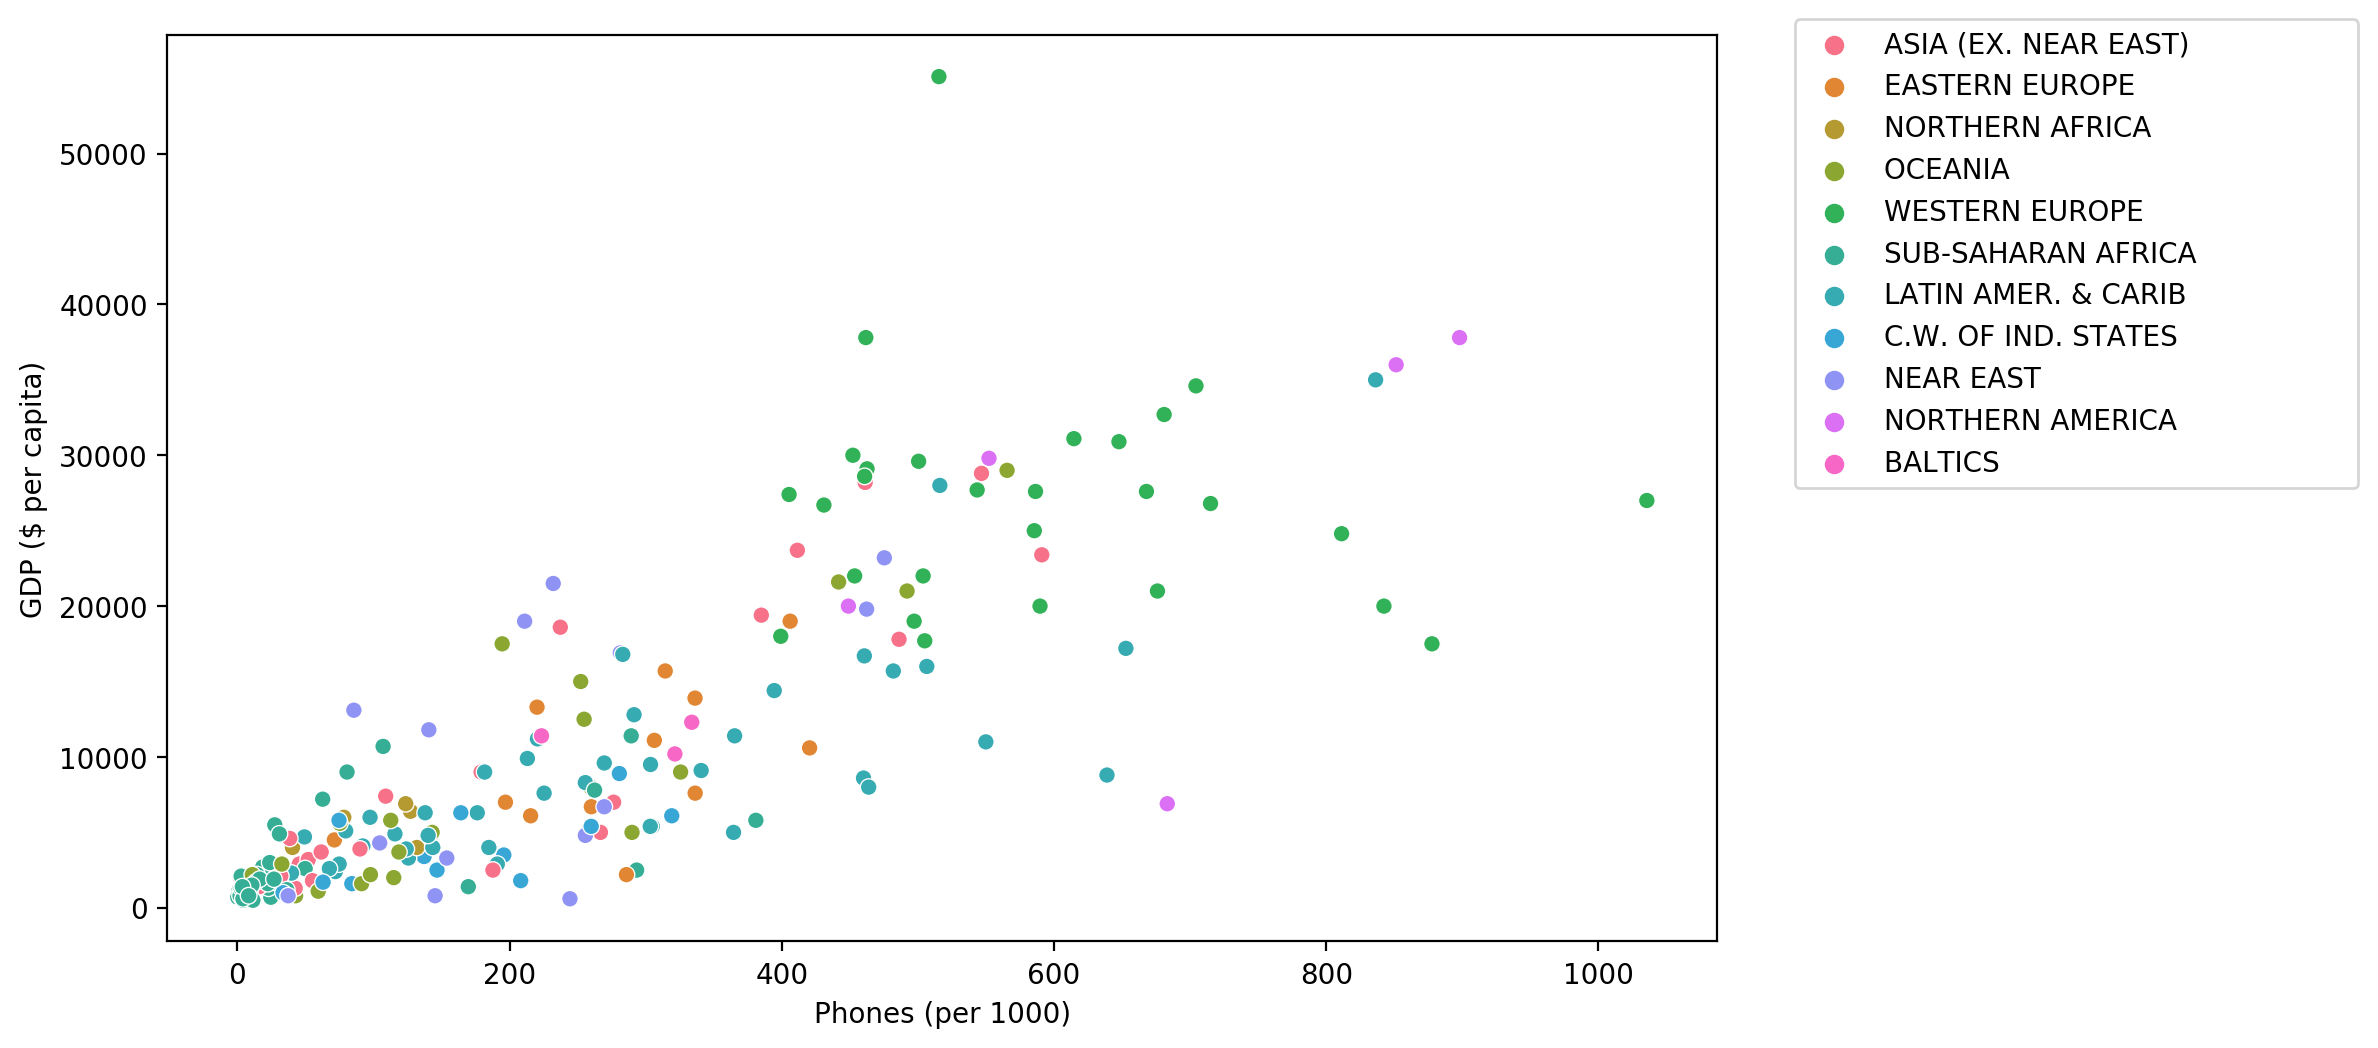

In [12]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='Phones (per 1000)', y='GDP ($ per capita)',hue='Region')
# plt.ylim(0,80000)
plt.legend(loc=(1.05,0.5))

Comparing most usual regions


In [13]:
df.Region = df.Region.str.strip()

In [14]:
df.Region.unique()

array(['ASIA (EX. NEAR EAST)', 'EASTERN EUROPE', 'NORTHERN AFRICA',
       'OCEANIA', 'WESTERN EUROPE', 'SUB-SAHARAN AFRICA',
       'LATIN AMER. & CARIB', 'C.W. OF IND. STATES', 'NEAR EAST',
       'NORTHERN AMERICA', 'BALTICS'], dtype=object)

In [15]:
df_regions = df.copy()
df_regions = df[df['Region'].isin(['ASIA (EX. NEAR EAST)','EASTERN EUROPE', 'WESTERN EUROPE'
                                     ,'LATIN AMER. & CARIB', 'NEAR EAST', 'NORTHERN AMERICA', 
                                     'BALTICS','C.W. OF IND. STATES'])]
df_regions.Region.unique()

array(['ASIA (EX. NEAR EAST)', 'EASTERN EUROPE', 'WESTERN EUROPE',
       'LATIN AMER. & CARIB', 'C.W. OF IND. STATES', 'NEAR EAST',
       'NORTHERN AMERICA', 'BALTICS'], dtype=object)

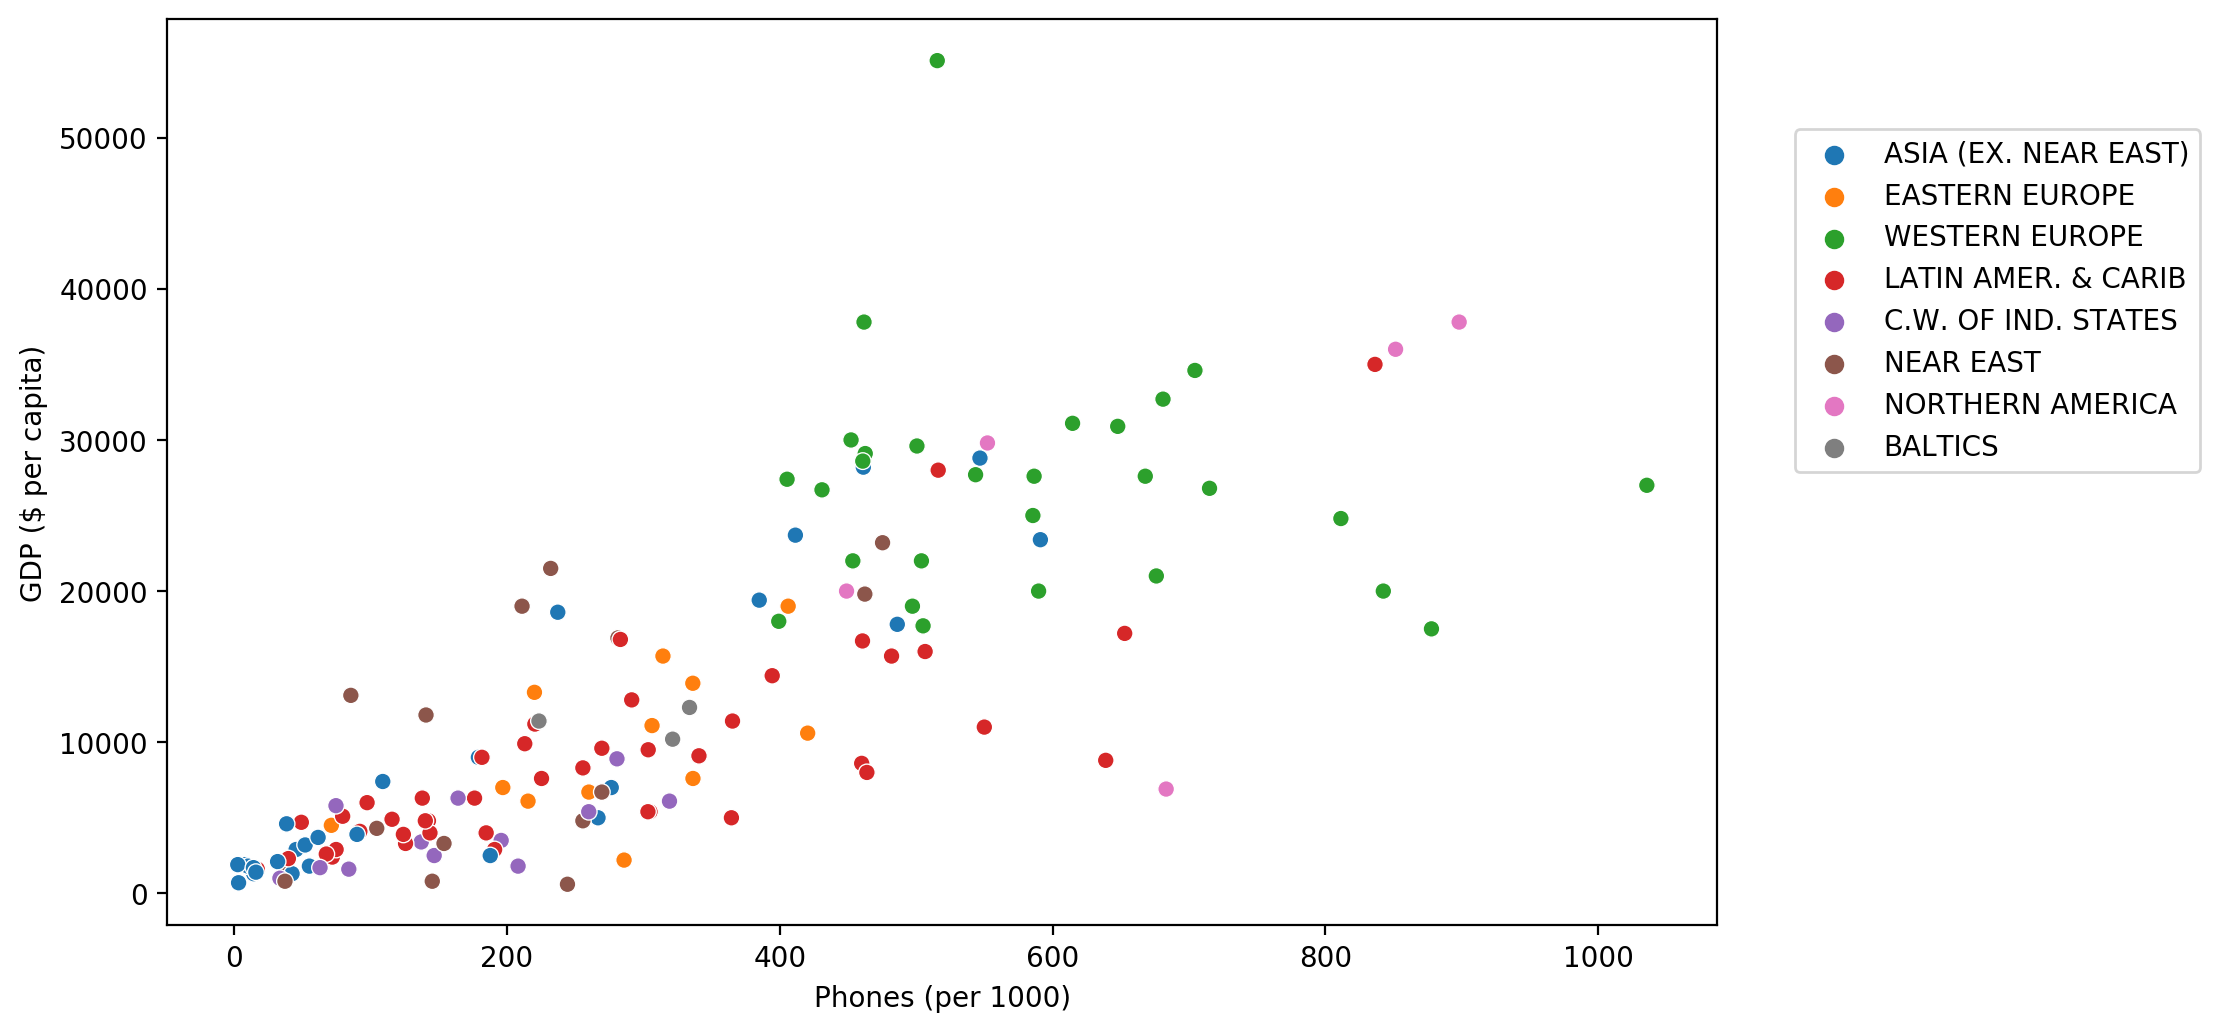

In [16]:
# plt.figure(figsize=(12,5),dpi=200)
# sns.scatterplot(data=df_regions,x='Phones (per 1000)', y='GDP ($ per capita)',hue='Region')#,alpha=0.4)#,palette='magma')
# plt.ylim(0,80000)
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df_regions,x='Phones (per 1000)', y='GDP ($ per capita)',hue='Region')
# plt.ylim(0,80000)
plt.legend(loc=(1.05,0.5))

Seems to be a positive correlation between phones per 1000 and GDP per capita, this due to more capacity for purchase goods more phones are offered and buyed by people.
Two outliers highlight, both from Western Europe, one with medium GDP value but high phones per 1000 and the other with higher GDP than any and medium phones per 1000.

#### Showing the relationship between GDP per Capita and Literacy

In [17]:
columns

array(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service'], dtype=object)

Text(0.5, 0, 'Consumo per cápita ($)')

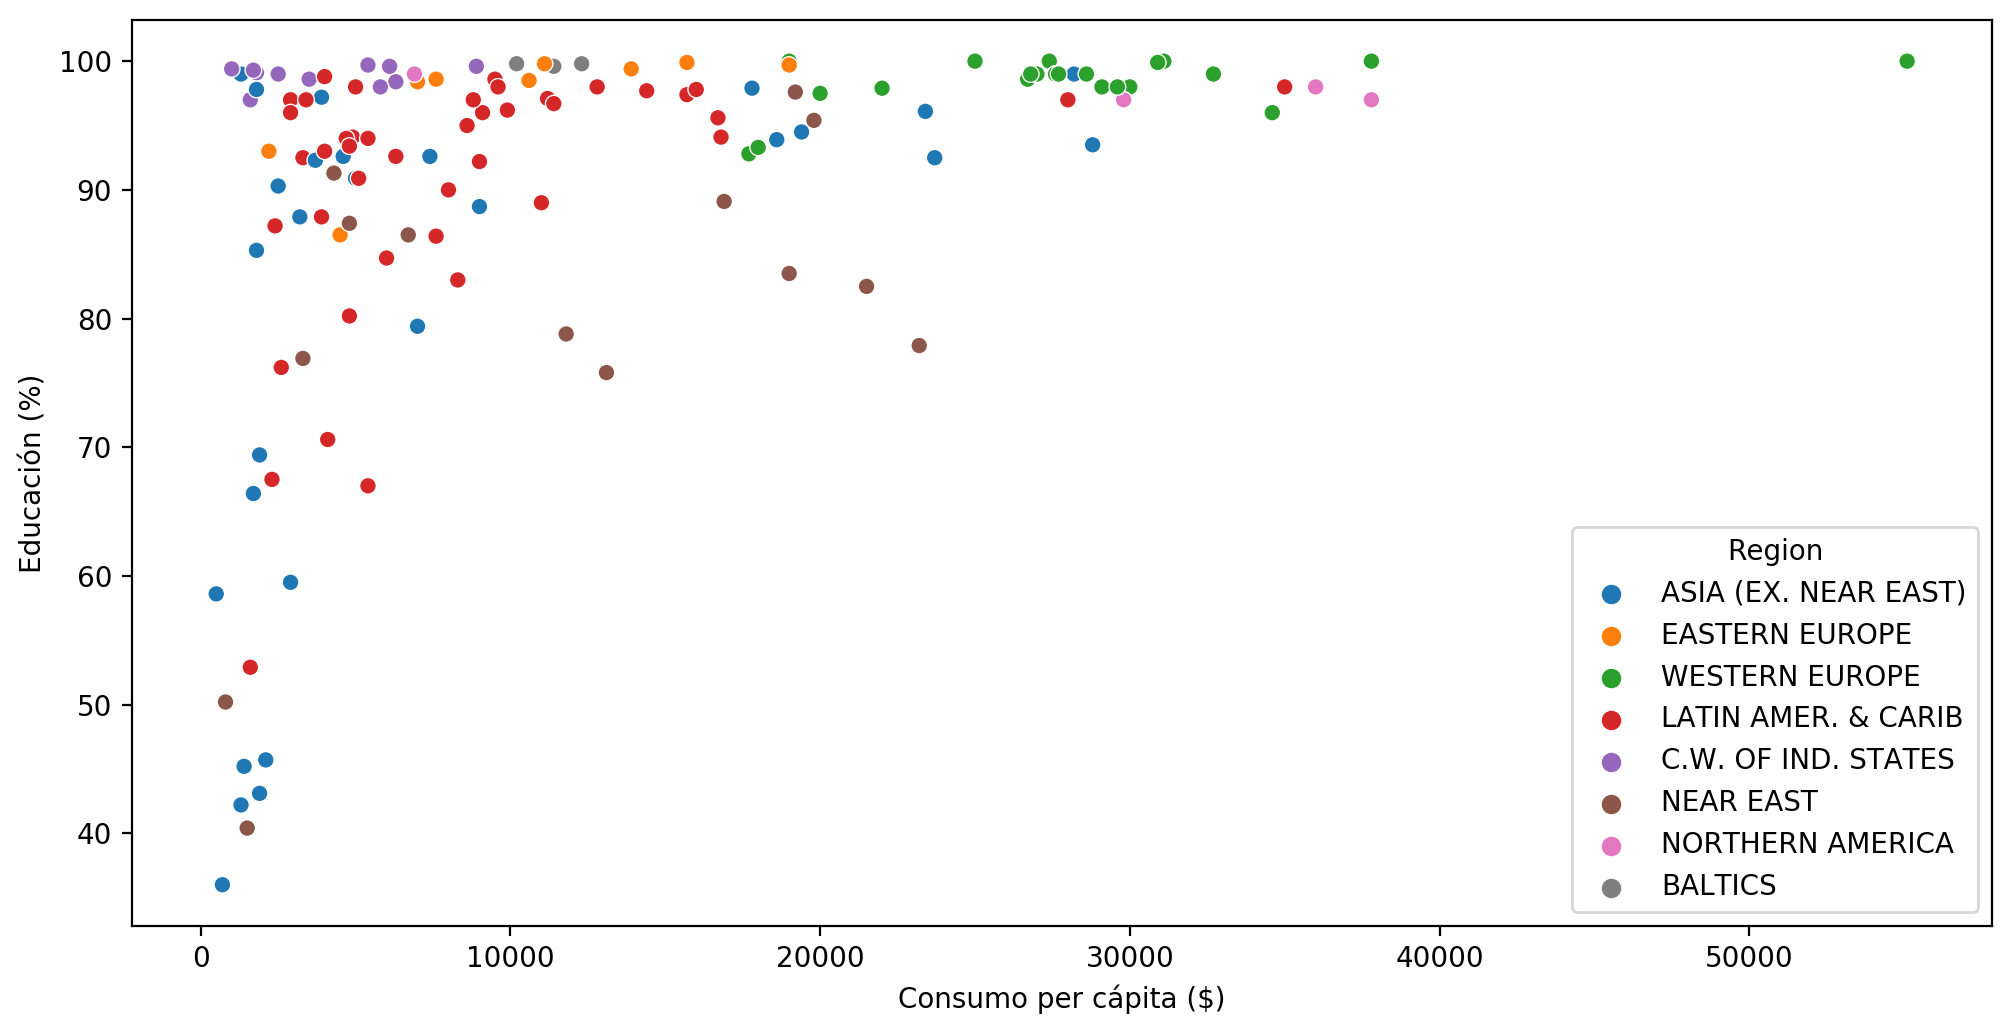

In [18]:
plt.figure(figsize=(12,6), dpi=200)
sns.scatterplot(data=df_regions,x='GDP ($ per capita)',y='Literacy (%)',hue='Region')
plt.ylabel('Educación (%)')
plt.xlabel('Consumo per cápita ($)')

We see gdp for northern america region (pink points) have two samples, maybe the right most being USA followed by Canada, in the right most places ones for around 95 % of literacy. Of course Western europe region has the right most place for gdp

#### Correlation between columns in the DataFrame

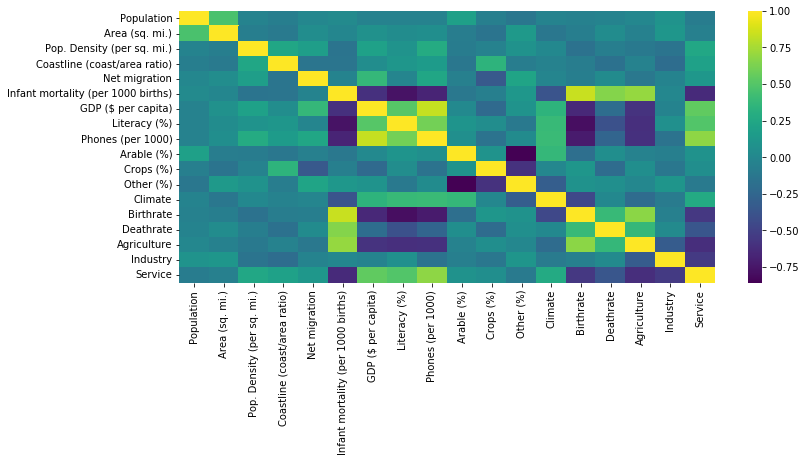

In [19]:
plt.figure(figsize=(12,5))
sns.heatmap(data=df.corr(),cmap='viridis')

#### Clustermap of the correlations between each column 

In [20]:
# dropping categorical columns
df_noregions = df.drop(labels=['Country','Region'],axis=1)

In [21]:
'''
- fill nans with:

infant mortality = 50
birthrate = 10
deathrate = 5
agriculture = 0.05
industry = 0.05
service = 0.07
literacy = 20
phones = 0.5
gdp  = 10000
climate = 3
'''

'\n- fill nans with:\n\ninfant mortality = 50\nbirthrate = 10\ndeathrate = 5\nagriculture = 0.05\nindustry = 0.05\nservice = 0.07\nliteracy = 20\nphones = 0.5\ngdp  = 10000\nclimate = 3\n'

In [22]:
#df_noregions['Literacy (%)'].isna().sum()
columns

array(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service'], dtype=object)

In [23]:
# filling nans with some values

df_noregions.fillna(value={'Net migration':0},inplace=True);
df_noregions.fillna(value={'Arable (%)':0},inplace=True);
df_noregions.fillna(value={'Crops (%)':0},inplace=True);
df_noregions.fillna(value={'Other (%)':0},inplace=True);
df_noregions.fillna(value={'Infant mortality (per 1000 births)':50},inplace=True);
df_noregions.fillna(value={'Birthrate':10},inplace=True);
df_noregions.fillna(value={'Deathrate':5},inplace=True);
df_noregions.fillna(value={'Agriculture':0.05},inplace=True);
df_noregions.fillna(value={'Industry':0.05},inplace=True);
df_noregions.fillna(value={'Service':0.07},inplace=True);
df_noregions.fillna(value={'Literacy (%)':20},inplace=True);
df_noregions.fillna(value={'Phones (per 1000)':0.5},inplace=True);
df_noregions.fillna(value={'GDP ($ per capita)':10000},inplace=True);
df_noregions.fillna(value={'Climate':3},inplace=True);


In [24]:
df_noregions.isna().sum()

Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

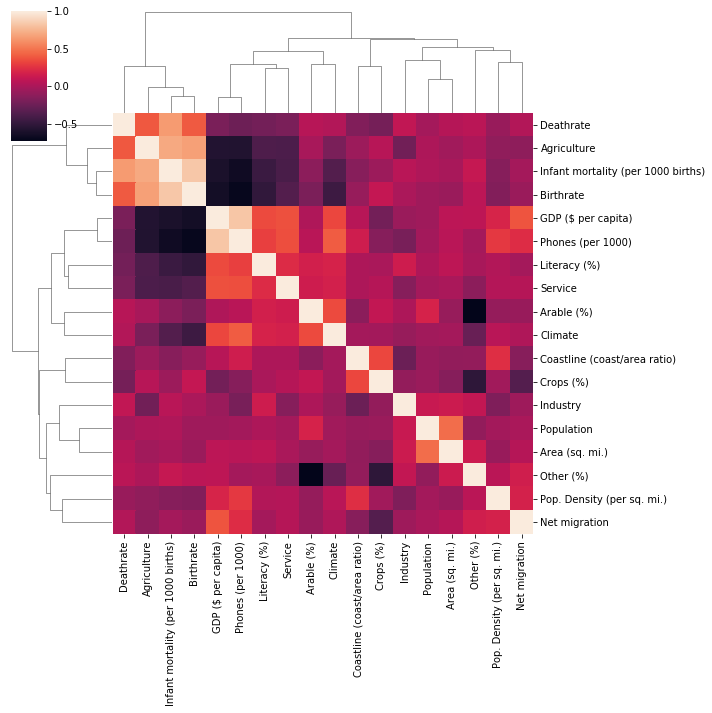

In [25]:
sns.clustermap(df_noregions.corr())
# sns.clustermap(df.corr())

## Data Preparation and Model Discovery


In [26]:
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

#### Looking for countries having NaN for Agriculture

In [27]:
islands = df[df.Agriculture.isna()].Country
islands = np.array([ 'American Samoa', 'Andorra', 'Gibraltar', 'Greenland', 'Guam', 'Mayotte', 'Montserrat',
'Nauru', 'N. Mariana Islands', 'Saint Helena', 'St Pierre & Miquelon', 'San Marino', 
           'Turks & Caicos Is', 'Wallis and Futuna', 'Western Sahara'])
islands

array(['American Samoa', 'Andorra', 'Gibraltar', 'Greenland', 'Guam',
       'Mayotte', 'Montserrat', 'Nauru', 'N. Mariana Islands',
       'Saint Helena', 'St Pierre & Miquelon', 'San Marino',
       'Turks & Caicos Is', 'Wallis and Futuna', 'Western Sahara'],
      dtype='<U20')

These countries are tiny islands or mostly desert

In [28]:
df_filled = df.copy()

In [29]:
df_filled.Country = df_filled.Country.str.strip()

In [30]:

df_filled[df_filled.Country.isin(islands)] = df_filled[df_filled.Country.isin(islands)].fillna(0) 

In [31]:
df_filled[df_filled.Agriculture.isna()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service


In [32]:
df = df_filled.copy()

In [33]:
df_filled.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [34]:
df = df_filled.copy()

#### Filling in the missing Climate values based on the mean climate value for its region


In [38]:
df_filled = df.copy()

In [39]:
df_filled.Climate = df_filled.groupby('Region').Climate.transform(lambda val: val.fillna(val.mean()))

In [40]:
df_filled.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [41]:
df = df_filled.copy()

In [40]:
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [42]:
df.groupby('Region')['Literacy (%)'].sum()

Region
ASIA (EX. NEAR EAST)    2227.5
BALTICS                  299.2
C.W. OF IND. STATES     1184.7
EASTERN EUROPE           873.8
LATIN AMER. & CARIB     3988.8
NEAR EAST               1113.3
NORTHERN AFRICA          336.2
NORTHERN AMERICA         391.0
OCEANIA                 1510.2
SUB-SAHARAN AFRICA      3125.5
WESTERN EUROPE          2263.0
Name: Literacy (%), dtype: float64

In [43]:
df_filled = df.copy()

In [44]:
df_filled['Literacy (%)'] = df_filled.groupby('Region')['Literacy (%)'].transform(lambda value: value.fillna(value.mean()))

In [45]:
df_filled.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

In [46]:
df = df_filled.copy()

In [47]:
df_dropped = df.copy()

In [48]:
countries = df_dropped[df_dropped.isna().any(axis=1)].Country
df_dropped = df_dropped.dropna(axis=0)

In [49]:
df_dropped.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [50]:
df = df_dropped.copy()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 226
Data columns (total 20 columns):
Country                               221 non-null object
Region                                221 non-null object
Population                            221 non-null int64
Area (sq. mi.)                        221 non-null int64
Pop. Density (per sq. mi.)            221 non-null float64
Coastline (coast/area ratio)          221 non-null float64
Net migration                         221 non-null float64
Infant mortality (per 1000 births)    221 non-null float64
GDP ($ per capita)                    221 non-null float64
Literacy (%)                          221 non-null float64
Phones (per 1000)                     221 non-null float64
Arable (%)                            221 non-null float64
Crops (%)                             221 non-null float64
Other (%)                             221 non-null float64
Climate                               221 non-null float64
Birthrate       

## Data Feature Preparation


#### Dropping Country column because it won't be useful for clustering

In [52]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [53]:
X  = df.drop('Country',axis=1)

In [54]:
X.columns

Index(['Region', 'Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service'],
      dtype='object')

In [55]:
X = pd.get_dummies(columns=['Region'],data=X)

In [56]:
X.columns

Index(['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service', 'Region_ASIA (EX. NEAR EAST)', 'Region_BALTICS',
       'Region_C.W. OF IND. STATES', 'Region_EASTERN EUROPE',
       'Region_LATIN AMER. & CARIB', 'Region_NEAR EAST',
       'Region_NORTHERN AFRICA', 'Region_NORTHERN AMERICA', 'Region_OCEANIA',
       'Region_SUB-SAHARAN AFRICA', 'Region_WESTERN EUROPE'],
      dtype='object')

In [57]:
X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1


### Scaling

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()

In [60]:
X_scaled = scaler.fit_transform(X)

In [61]:
X_scaled

array([[ 0.0133285 ,  0.01855412, -0.20308668, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.21730118, -0.32370888, -0.14378531, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 0.02905136,  0.97784988, -0.22956327, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [-0.06726127, -0.04756396, -0.20881553, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.15081724,  0.07669798, -0.22840201, ..., -0.31544015,
         1.82574186, -0.36514837],
       [-0.14464933, -0.12356132, -0.2160153 , ..., -0.31544015,
         1.82574186, -0.36514837]])

### Creating and Fitting Kmeans Model

#### Using a for loop to create and fit multiple KMeans models, testing from K=2-30 clusters. Keeping track of the Sum of Squared Distances for each K value to plot this out to create an "elbow" plot of K versus SSD. 

In [62]:
K = np.arange(2,31)
K

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [63]:
from sklearn.cluster import KMeans

In [64]:
ssd = []
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X_scaled)
    ssd.append(model.inertia_)

Text(0, 0.5, 'Sum Of Squares Distances')

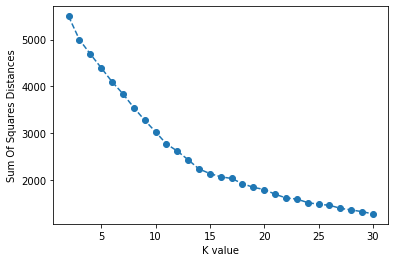

In [65]:
plt.plot(K,ssd,'o--')
plt.xlabel('K value')
plt.ylabel('Sum Of Squares Distances')

Between 10 and 15 seems to be a range of decreasing in ratio of sum of distances, and another between 15 and 20. Any k of these ranges is a good candidate to be the better k for clustering. The less k value the better in order to get a model with good bias and lower variance but with the most representative set of clusters 

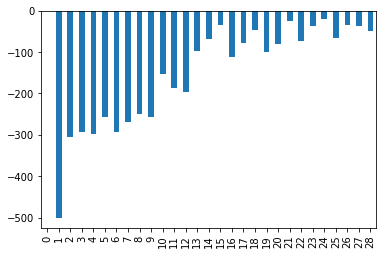

In [66]:
pd.Series(ssd).diff().plot(kind='bar')

For index=16 (K=17) we see a lower difference between the sum of distances so that k is the better option for clustering

# Model Interpretation


#### There is a significant drop off in SSD difference at K=17 (although we can see it continues to drop off past this). Let's explore which features are important in the decision of 17 clusters

In [67]:
# k=17
model2 = KMeans(n_clusters=17)

In [68]:
# k=17
clusterized = model2.fit_predict(X_scaled)

In [69]:
# k=17
centers = model2.cluster_centers_

In [70]:
# k=17
centers[:1]

array([[-2.20580784e-01, -3.29820168e-01, -4.47333236e-02,
         7.01560239e-03, -1.18277286e+00, -3.43691716e-01,
        -4.35398961e-01,  7.97249586e-02, -1.55070187e-01,
         3.68349414e-01,  1.44182875e+00, -9.67089433e-01,
        -1.45342292e-01, -6.77082030e-02, -4.06602392e-01,
        -3.02864890e-01,  1.20240509e-01,  4.43652518e-01,
        -3.73062003e-01, -1.17309283e-01, -2.39616919e-01,
        -2.28868854e-01,  1.40458305e+00, -2.69843536e-01,
        -1.67053814e-01, -1.52145155e-01, -3.15440149e-01,
        -1.50206645e-16, -3.65148372e-01]])

In [71]:
# k=17
clusterized

array([ 1,  7,  3, 16,  8,  1,  5,  5,  5,  4,  5, 16,  8,  4,  5, 10,  2,
        5,  4,  8,  5,  9, 13,  2,  5,  7,  1,  5,  5,  2,  7,  9,  2,  9,
        2,  9,  6,  9,  5,  1,  1,  5, 11,  5,  9,  9,  1,  5,  9,  7,  0,
        7,  8,  1,  0,  0,  5,  3,  0,  1,  9, 14,  9,  8, 16,  8,  8,  5,
       16,  1,  9, 10,  4,  8,  9,  8,  8, 13,  0,  5, 16,  5,  1,  9,  5,
        0,  5, 15,  7,  8, 11,  2,  2, 10,  8,  8, 10,  8,  0,  2,  8, 10,
        4,  9, 16,  2,  2, 10,  4,  2, 14, 10,  1,  1,  3,  8, 14,  8, 15,
        7,  9,  9,  2,  2,  1,  8, 16,  5,  1,  0,  9,  5, 12,  4,  2,  5,
        3,  1,  1, 16,  2,  8,  5, 16, 16,  5,  1,  9, 16,  8, 10,  2, 16,
        5, 16,  5,  5,  2,  7,  8,  5, 10,  5,  7,  6,  9,  5,  5,  0, 13,
        0, 16,  8,  0, 10,  9,  0,  1, 15,  7,  7, 16,  1,  1,  8,  2,  9,
        5,  1,  8,  8, 10,  2,  4,  1,  2,  9, 16,  0,  3, 10,  4,  5, 16,
        9,  4, 10,  8,  6,  5,  4, 16,  5,  2,  5, 16, 10,  3, 10,  1,  1])

In [72]:
model2.labels_

array([ 1,  7,  3, 16,  8,  1,  5,  5,  5,  4,  5, 16,  8,  4,  5, 10,  2,
        5,  4,  8,  5,  9, 13,  2,  5,  7,  1,  5,  5,  2,  7,  9,  2,  9,
        2,  9,  6,  9,  5,  1,  1,  5, 11,  5,  9,  9,  1,  5,  9,  7,  0,
        7,  8,  1,  0,  0,  5,  3,  0,  1,  9, 14,  9,  8, 16,  8,  8,  5,
       16,  1,  9, 10,  4,  8,  9,  8,  8, 13,  0,  5, 16,  5,  1,  9,  5,
        0,  5, 15,  7,  8, 11,  2,  2, 10,  8,  8, 10,  8,  0,  2,  8, 10,
        4,  9, 16,  2,  2, 10,  4,  2, 14, 10,  1,  1,  3,  8, 14,  8, 15,
        7,  9,  9,  2,  2,  1,  8, 16,  5,  1,  0,  9,  5, 12,  4,  2,  5,
        3,  1,  1, 16,  2,  8,  5, 16, 16,  5,  1,  9, 16,  8, 10,  2, 16,
        5, 16,  5,  5,  2,  7,  8,  5, 10,  5,  7,  6,  9,  5,  5,  0, 13,
        0, 16,  8,  0, 10,  9,  0,  1, 15,  7,  7, 16,  1,  1,  8,  2,  9,
        5,  1,  8,  8, 10,  2,  4,  1,  2,  9, 16,  0,  3, 10,  4,  5, 16,
        9,  4, 10,  8,  6,  5,  4, 16,  5,  2,  5, 16, 10,  3, 10,  1,  1])

In [73]:
X['K=17 cluster labels'] = model2.labels_

In [82]:
X.corr()['K=17 cluster labels'].sort_values()

Infant mortality (per 1000 births)   -0.320869
Deathrate                            -0.314948
Region_LATIN AMER. & CARIB           -0.289231
Industry                             -0.259971
Region_SUB-SAHARAN AFRICA            -0.215353
Region_ASIA (EX. NEAR EAST)          -0.198270
Birthrate                            -0.173648
Agriculture                          -0.164815
Region_NORTHERN AFRICA               -0.128055
Region_C.W. OF IND. STATES           -0.122492
Other (%)                            -0.082659
Area (sq. mi.)                       -0.003469
Arable (%)                            0.003616
Service                               0.016521
Region_EASTERN EUROPE                 0.024933
Population                            0.040016
Climate                               0.069131
Literacy (%)                          0.075141
Net migration                         0.100850
Region_WESTERN EUROPE                 0.119701
Region_NORTHERN AMERICA               0.123137
Crops (%)    

Text(0.5, 1.0, 'Correlation to labels')

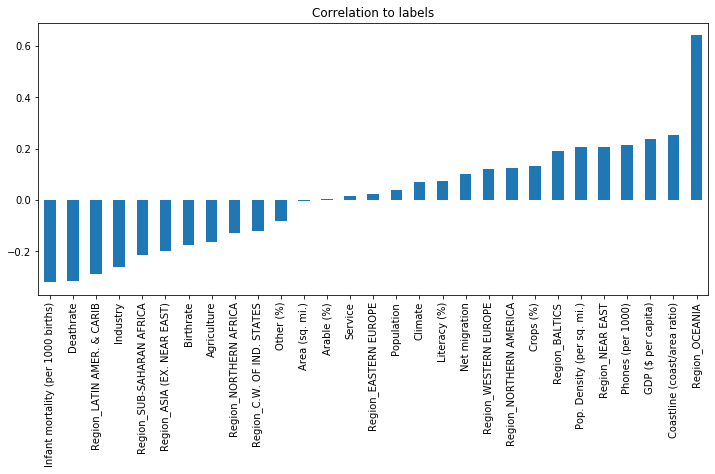

In [83]:
plt.figure(figsize=(12,5))
X.corr()['K=17 cluster labels'].sort_values().iloc[:-1].plot(kind='bar')
plt.title('Correlation to labels')


## Geographical Model Interpretation

#### The best way to interpret this model is through visualizing the clusters of countries on a map! 

In [84]:
model2

KMeans(n_clusters=17)

In [85]:
iso_codes = pd.read_csv(examples_folder + 'DATA/country_iso_codes.csv')

In [86]:
iso_codes.head()

,Country,ISO Code
0,Afghanistan,AFG
1,"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA


In [87]:
iso_mapping = dict(zip(iso_codes.Country.values, iso_codes['ISO Code'].values))

In [88]:
iso_mapping

{'Afghanistan': 'AFG',
 'Akrotiri and Dhekelia – See United Kingdom, The': 'Akrotiri and Dhekelia – See United Kingdom, The',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antarctica\u200a[a]': 'ATA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Ashmore and Cartier Islands – See Australia.': 'Ashmore and Cartier Islands – See Australia.',
 'Australia\u200a[b]': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas (the)': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia (Plurinational State of)': 'BOL',
 'Bonaire\xa0Sint Eustatius\xa0Saba': 'BES',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Bouvet Island': 'BVT',
 'Brazil': 'BRA',
 'British Indian Ocean Territory (the)': 'IOT',
 'British V

In [89]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [90]:
df['ISO Code'] = df['Country'].map(iso_mapping)

In [93]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,ISO Code,Cluster
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,AFG,1
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,ALB,7
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,DZA,3
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000,ASM,16
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000,AND,8


In [94]:
df['Cluster'] = model2.labels_

In [95]:
import plotly.express as px

In [109]:
fig = px.choropleth(df,locations='ISO Code',
                   color='Cluster',
                   hover_name='Country',
                   color_continuous_scale='Turbo')
                   #color_continuous_scale=px.colors.sequential.Plasma)
                

In [111]:
plt.figure(dpi=200)
fig.show()

<img src='newplot.png'>

---